##Random Walk

First step for a good forecasting is to figure out if the gathered data is a random walk or not. Below is a guidline for better diagnosis:

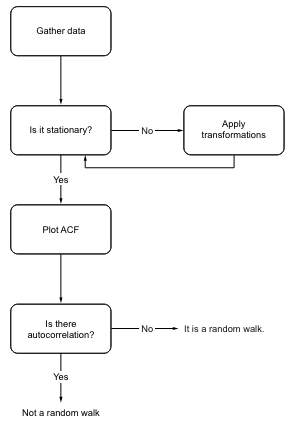

Now we are going to make a random walk data to better implement statistacal test to see if our data is random walk or we can think of further creating model for better prediction of future.

###Data Creation and Visualization

In [3]:
#Data Creation
import numpy as np

data = np.random.standard_normal(500)
data = np.cumsum(data)

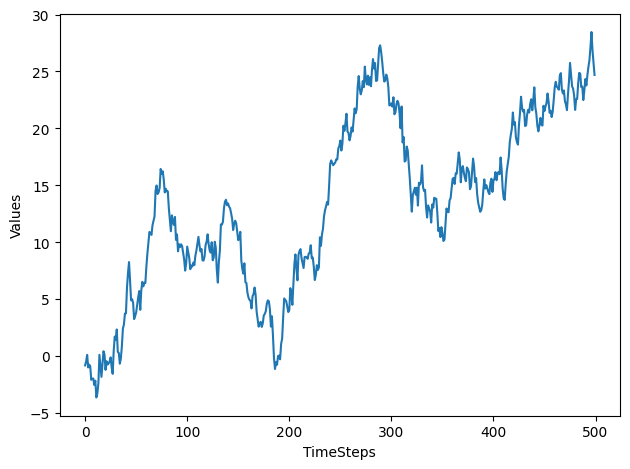

In [4]:
#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(data)
ax.set_xlabel('TimeSteps')
ax.set_ylabel('Values')
plt.tight_layout()

This plot is a random walk. In other word whether the next step goes up or down or how much it goes up or down is normal. To statistically prove the random walk being of our plot, here we go through our guidline above.

To prove if our data is stationary or not, statiscal test called Augmented Dickey-Fuller test comes handy. Null hypothesis of this test is that there is a unit root present in time series so that the alternative hypothesis is that there is no unit root present in time series so that our time series is stationary.

###ADF test

In [5]:
#ADF test
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data)
print(f'ADF Statistics = {adf_result[0]}')
print(f'P-value = {adf_result[1]}')

ADF Statistics = -1.5770510140085543
P-value = 0.4951104373182558


P-value above is above 0.05. It means that at this stage our data is not stationary. In other word mean or std are not a fix number through time and they are not independant of time. So to address this problem we are going to apply a first-order difference as a simple method of transformation in hope to see a stationary data.

###Transformation

In [6]:
transformed_data = np.diff(data, n=1)
adf_result = adfuller(transformed_data)
print(f'ADF Statistics = {adf_result[0]}')
print(f'P-value = {adf_result[1]}')

ADF Statistics = -21.035291776228856
P-value = 0.0


Here we get stationary time series and we are ready for the next step but before it would be nice to see what the transformed data or so to say a stationary data looks like.

###Stationary Time Series

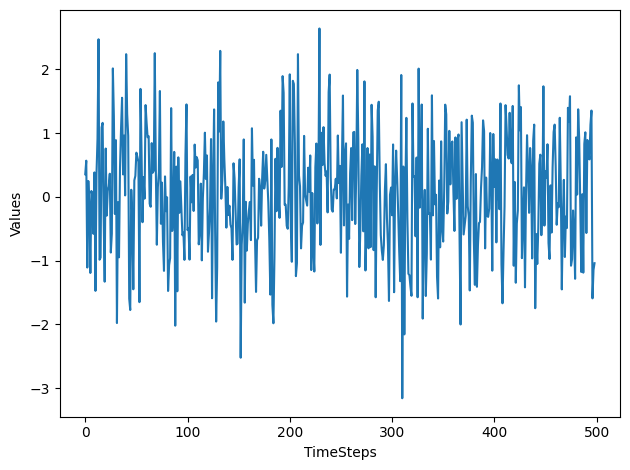

In [7]:
fig, ax = plt.subplots()
ax.plot(transformed_data)
ax.set_xlabel('TimeSteps')
ax.set_ylabel('Values')
plt.tight_layout()

Now is the time of plotting ACF or Auto Corrolation Function. ACF measures the linear relationship between lagged values of time series. In other word it measures the corrolation of the time serires it self.Lack of autocorrolation means there is no dependacy between today value and previous days values.

###ACF plot

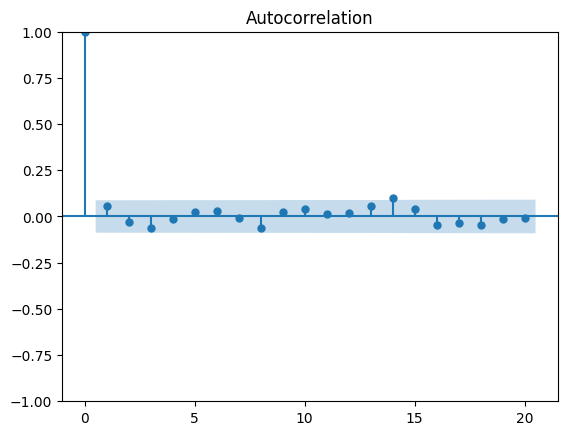

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(transformed_data, lags=20);

The shadow blue shade is a terretory that if r or corrolation coefficient is in that range, statistically we can consider it zero. Of course when lag equals zero the corrolation is 1. So eventually as it seems, out data is a radom walk and we went through all stages to best clarify this concept.

Now the question is that what if our time series is random walk? if not we simply can utilize statistcal model or more complex deep learning or machine learning model.But in that case we go for the next notebook:)